In [1]:
import pandas as pd

In [2]:
filmes = pd.read_csv('movies.csv')

In [3]:
filmes

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9727,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9728,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9729,193585,Flint (2017),Drama
9730,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
generos = filmes.genres.str.get_dummies()

In [5]:
generos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9727,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9728,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9729,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9730,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
norm_fit = StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
generos_normalizados = norm_fit.fit_transform(generos)

In [9]:
generos_normalizados

array([[-0.05921045, -0.48042496,  2.59303095, ..., -0.49108881,
        -0.20185219, -0.13213435],
       [-0.05921045, -0.48042496,  2.59303095, ..., -0.49108881,
        -0.20185219, -0.13213435],
       [-0.05921045, -0.48042496, -0.38564908, ..., -0.49108881,
        -0.20185219, -0.13213435],
       ...,
       [-0.05921045, -0.48042496, -0.38564908, ..., -0.49108881,
        -0.20185219, -0.13213435],
       [-0.05921045,  2.08149051, -0.38564908, ..., -0.49108881,
        -0.20185219, -0.13213435],
       [-0.05921045, -0.48042496, -0.38564908, ..., -0.49108881,
        -0.20185219, -0.13213435]])

In [10]:
from sklearn.cluster import KMeans

In [11]:
modelo_cluster = KMeans(n_clusters=3, random_state=42)

In [12]:
resultado_cluster = modelo_cluster.fit(generos_normalizados)

In [13]:
len(resultado_cluster.labels_)

9732

In [14]:
resultado_cluster.cluster_centers_

array([[-0.05921045, -0.09963753,  0.89371841,  2.23933834,  2.5946241 ,
         0.24977679, -0.32810294, -0.20182592, -0.59063286,  0.89089221,
        -0.09497483, -0.2720141 ,  0.19150457,  0.40696003, -0.12941009,
        -0.27150285,  0.05796949, -0.47175366, -0.16804253, -0.08164131],
       [-0.05921045,  1.7810355 ,  0.55785952, -0.16139373, -0.2660039 ,
        -0.36182588,  0.30098984, -0.21004666, -0.28669756,  0.07631156,
        -0.06160075,  0.0182149 ,  0.32310058, -0.17382629, -0.00991276,
        -0.29847593,  0.74299537,  0.56749983,  0.14907787,  0.05734673],
       [ 0.02421739, -0.47931222, -0.2726602 , -0.2520244 , -0.27016268,
         0.06696709, -0.03976783,  0.08482117,  0.15752445, -0.13912284,
         0.02961624,  0.03099789, -0.11471678, -0.00584338,  0.0198847 ,
         0.11850502, -0.21314076, -0.09443609, -0.01896334, -0.00504278]])

In [15]:
filmes['cluster'] = resultado_cluster.labels_

In [16]:
filmes

,movieId,title,genres,cluster
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2
4,5,Father of the Bride Part II (1995),Comedy,2
...,...,...,...,...
9727,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0
9728,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0
9729,193585,Flint (2017),Drama,2
9730,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0


In [17]:
generos.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [18]:
resultado_df = pd.DataFrame(resultado_cluster.cluster_centers_, columns=generos.columns)

In [19]:
resultado_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059210,-0.099638,0.893718,2.239338,2.594624,0.249777,-0.328103,-0.201826,-0.590633,0.890892,-0.094975,-0.272014,0.191505,0.406960,-0.129410,-0.271503,0.057969,-0.471754,-0.168043,-0.081641
1,-0.059210,1.781036,0.557860,-0.161394,-0.266004,-0.361826,0.300990,-0.210047,-0.286698,0.076312,-0.061601,0.018215,0.323101,-0.173826,-0.009913,-0.298476,0.742995,0.567500,0.149078,0.057347
2,0.024217,-0.479312,-0.272660,-0.252024,-0.270163,0.066967,-0.039768,0.084821,0.157524,-0.139123,0.029616,0.030998,-0.114717,-0.005843,0.019885,0.118505,-0.213141,-0.094436,-0.018963,-0.005043


In [20]:
resultado_df.transpose().plot.bar(subplots=True, figsize=(25, 25),sharex=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0CFC4B6C8>,
      dtype=object)

In [21]:
def inertia_kmens(numero_de_cluster, generos):
    modelo = KMeans(n_clusters=numero_de_cluster, random_state=42)
    modelo.fit(generos)
    return numero_de_cluster, modelo.inertia_

In [22]:
inertia_kmens(numero_de_cluster=3, generos=generos_normalizados)

(3, 167628.6783935236)

In [23]:
resultado_inertia = []
for k in range(1, 40):
    resultado_inertia.append(inertia_kmens(numero_de_cluster=k, generos=generos_normalizados))

In [24]:
print(len(resultado_inertia))
resultado_inertia[0]

39


(1, 194640.0)

In [25]:
resultado = pd.DataFrame(resultado_inertia, columns=['k', 'inertia'])

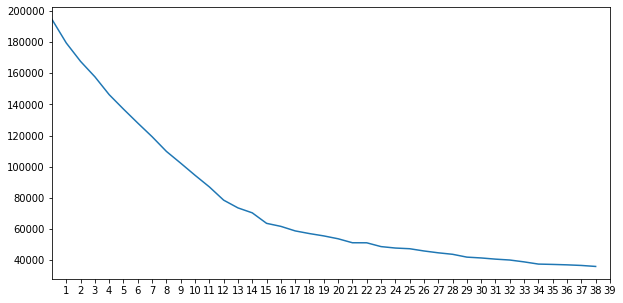

In [26]:
resultado.inertia.plot(xticks=resultado.k, figsize=(10, 5))

In [27]:
modelo_cluster = KMeans(n_clusters=11, random_state=42)

In [28]:
resultado_cluster = modelo_cluster.fit(generos_normalizados)

In [29]:
filmes['cluster'] = resultado_cluster.labels_

In [30]:
filmes

,movieId,title,genres,cluster
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0
2,3,Grumpier Old Men (1995),Comedy|Romance,3
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,2
...,...,...,...,...
9727,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0
9728,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0
9729,193585,Flint (2017),Drama,2
9730,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,9


In [31]:
resultado_df = pd.DataFrame(resultado_cluster.cluster_centers_, columns=generos.columns)

In [32]:
resultado_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05921,-0.230667,0.947497,1.770712,3.349482,0.348987,-0.329715,-0.210497,-0.591597,0.986110,-0.094975,-0.319114,-0.128464,0.543069,-0.130898,-0.259188,-0.093811,-0.472423,-0.186620,-0.132134
1,-0.05921,-0.153664,-0.334568,-0.205532,-0.261649,-0.402329,-0.198512,-0.207289,-0.562125,0.002015,-0.094975,2.995215,-0.128464,-0.146955,0.341796,-0.373250,0.346152,0.711652,-0.201852,-0.132134
2,-0.05921,-0.316420,-0.309529,-0.175528,-0.270163,0.150856,-0.374673,0.290535,0.154286,-0.203137,-0.094975,-0.333866,-0.128464,0.002049,-0.088925,-0.442739,-0.328429,-0.245788,-0.201852,-0.132134
3,-0.05921,-0.401655,-0.248272,-0.216311,-0.267255,0.418679,-0.294459,-0.210559,0.311076,-0.059585,-0.094975,-0.333866,-0.128464,0.097695,-0.131946,2.258665,-0.256555,-0.391178,-0.201852,-0.132134
4,16.88891,-0.480425,-0.385649,-0.258595,-0.270163,-0.792101,-0.374673,-0.217606,-0.900523,-0.294563,-0.094975,-0.333866,-0.128464,-0.188227,-0.250123,-0.442739,-0.334436,-0.491089,-0.201852,-0.132134
5,-0.05921,0.641699,-0.255448,-0.225472,-0.263077,-0.231265,2.362185,-0.200432,0.170450,-0.255068,-0.094975,-0.321987,-0.128464,-0.158784,0.288003,-0.343937,-0.278088,0.870675,-0.201852,-0.132134
6,-0.05921,0.128811,0.250045,-0.183126,-0.124859,-0.303516,-0.189083,-0.188259,-0.189320,-0.159584,-0.094975,-0.191771,-0.128464,0.147198,-0.172413,-0.113300,-0.192535,-0.244515,0.112536,7.568055
7,-0.05921,1.027538,1.122543,0.629203,0.483945,-0.441005,-0.162772,0.026093,-0.493234,0.802925,-0.094975,-0.081024,7.784275,0.090303,-0.088800,-0.288862,0.970133,0.068774,-0.071321,-0.034664
8,-0.05921,-0.333188,-0.317174,-0.163752,-0.270163,-0.744870,1.444532,-0.217606,0.255218,-0.252155,10.529106,-0.257335,-0.128464,-0.188227,0.921783,-0.194334,-0.219796,0.699976,-0.201852,-0.043626
9,-0.05921,1.135222,1.377179,0.260899,-0.257660,-0.393261,-0.352316,-0.212556,-0.444727,0.530041,-0.094975,-0.291947,-0.128464,-0.159365,0.021795,-0.360535,1.751690,0.238218,-0.201852,-0.132134


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0D1800788>,
      dtype=object)

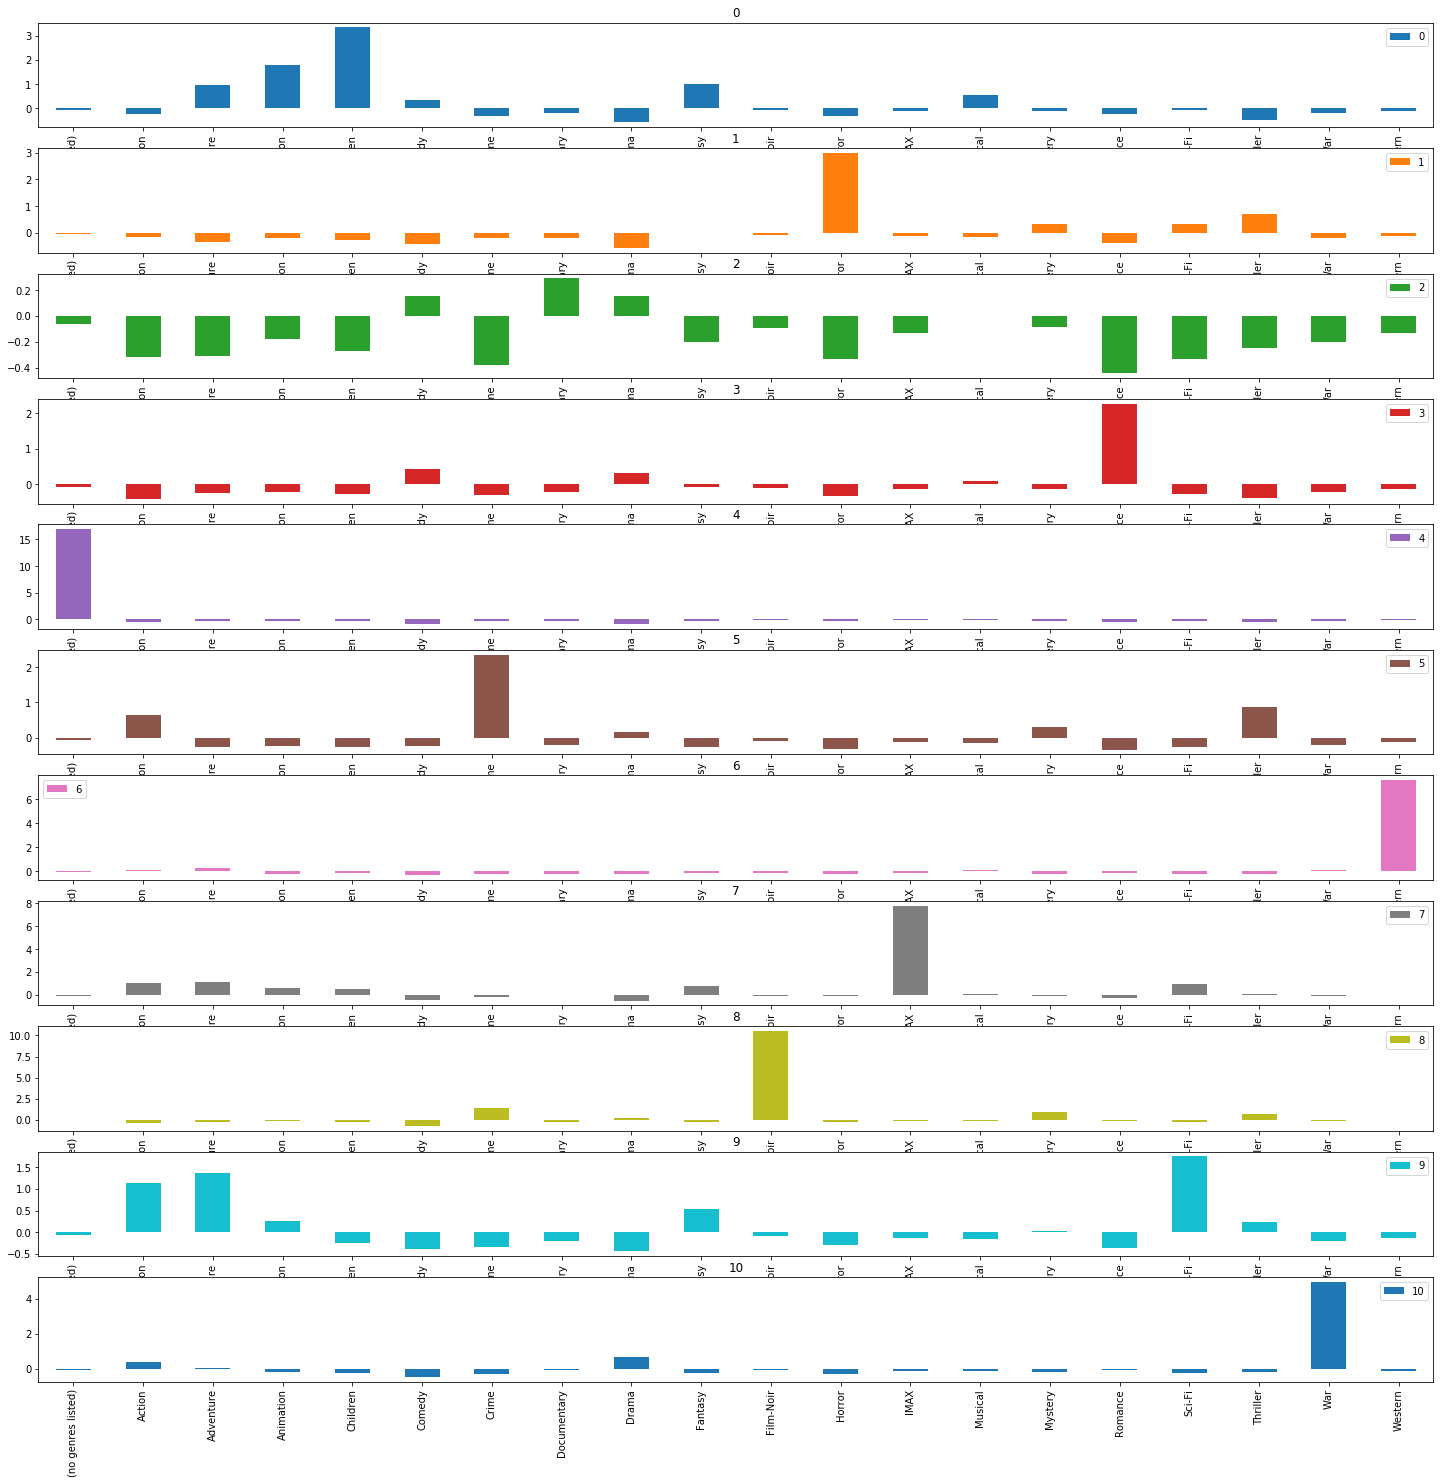

In [33]:
resultado_df.transpose().plot.bar(subplots=True, figsize=(25, 25),sharex=False)

In [34]:
filmes

,movieId,title,genres,cluster
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0
2,3,Grumpier Old Men (1995),Comedy|Romance,3
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,2
...,...,...,...,...
9727,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0
9728,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0
9729,193585,Flint (2017),Drama,2
9730,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,9


In [49]:
filme_usr = 'Father of the Bride Part II (1995)'
filme_usr

'Father of the Bride Part II (1995)'

In [50]:
n_cluster = filmes.loc[filmes.title == filme_usr,'cluster']

In [51]:
n_cluster

4    2
Name: cluster, dtype: int32

In [52]:
n_cluster = int(n_cluster)

In [53]:
filmes.loc[filmes.cluster == n_cluster,:].sample(5)

,movieId,title,genres,cluster
9388,164540,Amanda Knox (2016),Documentary,2
1624,2172,"Strike! (a.k.a. All I Wanna Do, The Hairy Bird...",Comedy|Drama,2
9724,193571,Silver Spoon (2014),Comedy|Drama,2
9569,174815,The House (2017),Comedy,2
8911,135815,The Magnificent Ruffians (1979),Action|Drama,2


In [54]:
import joblib